In [1]:
import json
from datetime import datetime
from dateutil import tz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn


In [2]:
with open('../newest_ts', 'r') as f:
    ts = f.read()

data_path = f"../data/data_{ts}.json"
with open(data_path, 'r') as f:
    data = json.load(f)

In [3]:
def ts2dt(ts, format='%Y-%m-%d %H:%M:%S'):
    return (datetime.utcfromtimestamp(int(ts))
                    .replace(tzinfo=tz.tzutc())
                    .astimezone(tz.tzlocal())
                    .strftime(format))

print(f"Recent query happens at {ts2dt(ts)}")

Recent query happens at 2021-08-23 01:24:26


In [4]:
data.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'hourly', 'daily'])

In [5]:
data['current']

{'dt': 1629653066,
 'sunrise': 1629669780,
 'sunset': 1629715720,
 'temp': 29.51,
 'feels_like': 36.51,
 'pressure': 1007,
 'humidity': 82,
 'dew_point': 26.11,
 'uvi': 0,
 'clouds': 50,
 'visibility': 10000,
 'wind_speed': 3.2,
 'wind_deg': 207,
 'wind_gust': 4.71,
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}]}

In [7]:
data['hourly'][0]

{'dt': 1629651600,
 'temp': 29.51,
 'feels_like': 36.51,
 'pressure': 1007,
 'humidity': 82,
 'dew_point': 26.11,
 'uvi': 0,
 'clouds': 50,
 'visibility': 10000,
 'wind_speed': 3.2,
 'wind_deg': 207,
 'wind_gust': 4.71,
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'pop': 0.04}

In [8]:
df_hourly = pd.DataFrame(data['hourly'])
df_daily = pd.DataFrame(data['daily'])

In [9]:
df_hourly.head()

,dt,temp,feels_like,pressure,humidity,dew_point,uvi,clouds,visibility,wind_speed,wind_deg,wind_gust,weather,pop,rain
0,1629651600,29.51,36.51,1007,82,26.11,0.0,50,10000,3.20,207,4.71,"[{'id': 802, 'main': 'Clouds', 'description': ...",0.04,NaN
1,1629655200,29.16,35.89,1007,83,25.97,0.0,52,10000,3.74,205,5.23,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.12,NaN
2,1629658800,28.79,34.79,1007,83,25.61,0.0,70,10000,3.86,205,5.25,"[{'id': 803, 'main': 'Clouds', 'description': ...",0.73,NaN
3,1629662400,28.35,33.72,1006,84,25.38,0.0,79,10000,3.56,212,4.97,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.73,{'1h': 0.33}
4,1629666000,27.80,32.19,1007,84,24.85,0.0,78,10000,3.17,215,4.36,"[{'id': 500, 'main': 'Rain', 'description': 'l...",0.81,{'1h': 0.45}


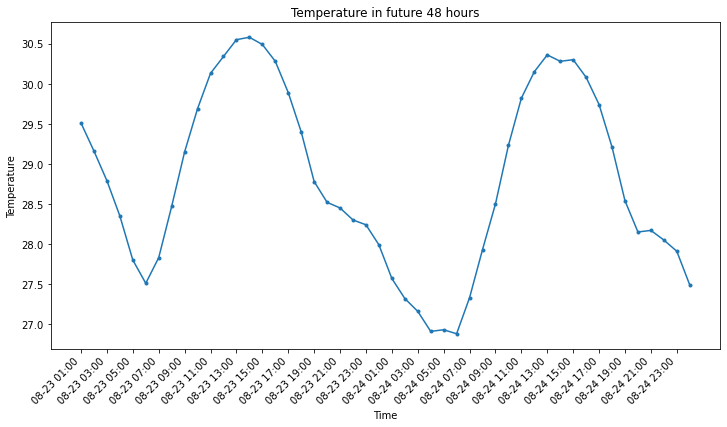

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(df_hourly.temp, '.-')
ax.set(title='Temperature in future 48 hours', xlabel='Time', ylabel='Temperature')
ax.set_xticks(list(range(0, len(df_hourly), 2)))
ax.set_xticklabels([ts2dt(ts, '%m-%d %H:%M') for i, ts in enumerate(df_hourly.dt) if i%2==0], 
                   rotation=45, ha="right")
plt.show()